In [4]:
"""
Jupyter Notebook for training and testing the Terrain Classification ResNet-18 CNN. 
"""

'\nJupyter Notebook for training and testing the Terrain Classification ResNet-18 CNN. \n'

In [13]:
"""
Cell Purpose: Import all required modules
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets, models    

In [5]:
"""
Cell Purpose: Defining important model parameters
"""

#Mapping for CNN output
label_map = {"Asphalt": 0, "Dirt": 1, "Grassy": 2, "Rocky": 3}

#CNN parameters
batch_size = 16
num_workers = 0

#Training and testing transforms:
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.RandomRotation(10),
                                      transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485,0.456,0.406), (0.229,0.224,0.225))
                                    ])
test_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.485,0.456,0.406), (0.229,0.224,0.225))
                                    ])

#Training and testing datasets:
train_data = datasets.ImageFolder("C:/Users/gupte/Desktop/racecar-arjun-gupte/labs/FinalDataSet/Train", transform=train_transform)
test_data = datasets.ImageFolder("C:/Users/gupte/Desktop/racecar-arjun-gupte/labs/FinalDataSet/Test", transform=test_transform)

#Training and testing data loaders:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=False)

#Create pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

#Change last layer's output dimension to the desired number (4 output categories => out_features = 4)
model.fc = nn.Linear(in_features=512, out_features=4)
#print(model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\gupte/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [6]:
"""
Cell Purpose: Train the model
"""

#Model loss function
criterion = nn.CrossEntropyLoss()

#Model optimizer function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#Model scheduler function
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

#Number of epochs for training
n_epochs = 30

#Number of iterations per epoch for training - given batch size, it will take n_iterations to complete one epoch
n_iterations = int(len(train_data)/batch_size)

#List for training loss values
train_loss_progress = []

#Put the model in training mode
model.train()

#Go through each epoch
for epoch in range(n_epochs):

    #Reset training loss every epoch
    train_loss = 0.0

    #Go through each iteration
    for iter, (data, target) in enumerate(train_loader):

        print("Epoch:", epoch, "Iteration:", iter, "out of:", n_iterations)

        #Clear the gradients of all optimized variables every iteration
        optimizer.zero_grad()

        #Forward pass: Feed data into model and get outputs
        outputs = model(data)
        #print(outputs)

        #Calculate the loss (error)
        loss = criterion(outputs, target)

        #Backward pass: Compute gradient of the loss with respect to model parameters
        loss.backward()

        #Perform a single optimization step (parameter update)
        optimizer.step()

        #Update training loss for the epoch (multiply by data.size(0) because we are calculating loss for not one, but data.size() images)
        train_loss += loss.item()*data.size(0)

    #Have the scheduler take a step
    scheduler.step()

    #Calculate average loss for the epoch and append to train_loss_progress
    train_loss = train_loss/len(train_loader.dataset)
    train_loss_progress.append(train_loss)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))
    

#Save the model after training is finished
PATH = "./TerrainNet.pt"
torch.save(model.state_dict(), PATH)

Epoch: 0 Iteration: 0 out of: 27
Epoch: 0 Iteration: 1 out of: 27
Epoch: 0 Iteration: 2 out of: 27
Epoch: 0 Iteration: 3 out of: 27
Epoch: 0 Iteration: 4 out of: 27
Epoch: 0 Iteration: 5 out of: 27
Epoch: 0 Iteration: 6 out of: 27
Epoch: 0 Iteration: 7 out of: 27
Epoch: 0 Iteration: 8 out of: 27
Epoch: 0 Iteration: 9 out of: 27
Epoch: 0 Iteration: 10 out of: 27
Epoch: 0 Iteration: 11 out of: 27
Epoch: 0 Iteration: 12 out of: 27
Epoch: 0 Iteration: 13 out of: 27
Epoch: 0 Iteration: 14 out of: 27
Epoch: 0 Iteration: 15 out of: 27
Epoch: 0 Iteration: 16 out of: 27
Epoch: 0 Iteration: 17 out of: 27
Epoch: 0 Iteration: 18 out of: 27
Epoch: 0 Iteration: 19 out of: 27
Epoch: 0 Iteration: 20 out of: 27
Epoch: 0 Iteration: 21 out of: 27
Epoch: 0 Iteration: 22 out of: 27
Epoch: 0 Iteration: 23 out of: 27
Epoch: 0 Iteration: 24 out of: 27
Epoch: 0 Iteration: 25 out of: 27
Epoch: 0 Iteration: 26 out of: 27
Epoch: 0 Iteration: 27 out of: 27
Epoch: 1 	Training Loss: 0.929209
Epoch: 1 Iteration: 0 ou

Epoch: 8 Iteration: 12 out of: 27
Epoch: 8 Iteration: 13 out of: 27
Epoch: 8 Iteration: 14 out of: 27
Epoch: 8 Iteration: 15 out of: 27
Epoch: 8 Iteration: 16 out of: 27
Epoch: 8 Iteration: 17 out of: 27
Epoch: 8 Iteration: 18 out of: 27
Epoch: 8 Iteration: 19 out of: 27
Epoch: 8 Iteration: 20 out of: 27
Epoch: 8 Iteration: 21 out of: 27
Epoch: 8 Iteration: 22 out of: 27
Epoch: 8 Iteration: 23 out of: 27
Epoch: 8 Iteration: 24 out of: 27
Epoch: 8 Iteration: 25 out of: 27
Epoch: 8 Iteration: 26 out of: 27
Epoch: 8 Iteration: 27 out of: 27
Epoch: 9 	Training Loss: 0.071155
Epoch: 9 Iteration: 0 out of: 27
Epoch: 9 Iteration: 1 out of: 27
Epoch: 9 Iteration: 2 out of: 27
Epoch: 9 Iteration: 3 out of: 27
Epoch: 9 Iteration: 4 out of: 27
Epoch: 9 Iteration: 5 out of: 27
Epoch: 9 Iteration: 6 out of: 27
Epoch: 9 Iteration: 7 out of: 27
Epoch: 9 Iteration: 8 out of: 27
Epoch: 9 Iteration: 9 out of: 27
Epoch: 9 Iteration: 10 out of: 27
Epoch: 9 Iteration: 11 out of: 27
Epoch: 9 Iteration: 12 o

Epoch: 16 Iteration: 18 out of: 27
Epoch: 16 Iteration: 19 out of: 27
Epoch: 16 Iteration: 20 out of: 27
Epoch: 16 Iteration: 21 out of: 27
Epoch: 16 Iteration: 22 out of: 27
Epoch: 16 Iteration: 23 out of: 27
Epoch: 16 Iteration: 24 out of: 27
Epoch: 16 Iteration: 25 out of: 27
Epoch: 16 Iteration: 26 out of: 27
Epoch: 16 Iteration: 27 out of: 27
Epoch: 17 	Training Loss: 0.043472
Epoch: 17 Iteration: 0 out of: 27
Epoch: 17 Iteration: 1 out of: 27
Epoch: 17 Iteration: 2 out of: 27
Epoch: 17 Iteration: 3 out of: 27
Epoch: 17 Iteration: 4 out of: 27
Epoch: 17 Iteration: 5 out of: 27
Epoch: 17 Iteration: 6 out of: 27
Epoch: 17 Iteration: 7 out of: 27
Epoch: 17 Iteration: 8 out of: 27
Epoch: 17 Iteration: 9 out of: 27
Epoch: 17 Iteration: 10 out of: 27
Epoch: 17 Iteration: 11 out of: 27
Epoch: 17 Iteration: 12 out of: 27
Epoch: 17 Iteration: 13 out of: 27
Epoch: 17 Iteration: 14 out of: 27
Epoch: 17 Iteration: 15 out of: 27
Epoch: 17 Iteration: 16 out of: 27
Epoch: 17 Iteration: 17 out of

Epoch: 24 Iteration: 23 out of: 27
Epoch: 24 Iteration: 24 out of: 27
Epoch: 24 Iteration: 25 out of: 27
Epoch: 24 Iteration: 26 out of: 27
Epoch: 24 Iteration: 27 out of: 27
Epoch: 25 	Training Loss: 0.037157
Epoch: 25 Iteration: 0 out of: 27
Epoch: 25 Iteration: 1 out of: 27
Epoch: 25 Iteration: 2 out of: 27
Epoch: 25 Iteration: 3 out of: 27
Epoch: 25 Iteration: 4 out of: 27
Epoch: 25 Iteration: 5 out of: 27
Epoch: 25 Iteration: 6 out of: 27
Epoch: 25 Iteration: 7 out of: 27
Epoch: 25 Iteration: 8 out of: 27
Epoch: 25 Iteration: 9 out of: 27
Epoch: 25 Iteration: 10 out of: 27
Epoch: 25 Iteration: 11 out of: 27
Epoch: 25 Iteration: 12 out of: 27
Epoch: 25 Iteration: 13 out of: 27
Epoch: 25 Iteration: 14 out of: 27
Epoch: 25 Iteration: 15 out of: 27
Epoch: 25 Iteration: 16 out of: 27
Epoch: 25 Iteration: 17 out of: 27
Epoch: 25 Iteration: 18 out of: 27
Epoch: 25 Iteration: 19 out of: 27
Epoch: 25 Iteration: 20 out of: 27
Epoch: 25 Iteration: 21 out of: 27
Epoch: 25 Iteration: 22 out of

In [19]:
"""
Cell Purpose: Test the model
"""

correct_predictions = 0
total_predictions = 0
target_values = np.array([])
predicted_values = np.array([])

#Stores model accuracy as percentages
test_accuracy_progress = []

#Put the model in testing mode
model.eval()

with torch.no_grad():
    
    #16 images at a time (batch size = 16)
    for data, target in test_loader:

        #Pass data into model and get output
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)

        #Update performance variables
        total_predictions += target.size(0)
        correct_predictions += (predicted == target).sum().item() 
        predicted = predicted.float()
        target = target.float()

        #Record predicted and target values
        predicted_values = np.concatenate([predicted_values, predicted.tolist()])
        target_values = np.concatenate([target_values, target.tolist()])

        #Record model accuracy for the current batch of images
        test_accuracy_progress.append(100 * correct_predictions / total_predictions)

print('Final accuracy of the network on the test set: %d %%' % (100 * correct_predictions / total_predictions))

Final accuracy of the network on the test set: 87 %


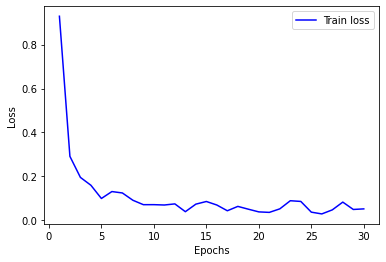

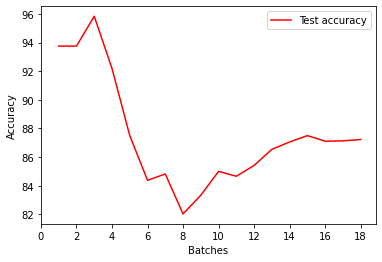

In [22]:
"""
Cell Purpose: Plot training and testing results
"""

#Plot training results
training_loss_range = np.arange(1, len(train_loss_progress) + 1)
fig, axs = plt.subplots()
axs.plot(training_loss_range, train_loss_progress, c='b', label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0, n_epochs + 1, 5), range(0, n_epochs + 1, 5))
axs.legend()
plt.show()

#Plot testing results
testing_accuracy_range = np.arange(1, len(test_accuracy_progress) + 1)
fig, axs = plt.subplots()
axs.plot(testing_accuracy_range, test_accuracy_progress, c='r', label="Test accuracy")
plt.xlabel('Batches')
plt.ylabel('Accuracy')
plt.xticks(range(0, len(test_accuracy_progress) + 1, 2), range(0, len(test_accuracy_progress) + 1, 2))
axs.legend()
plt.show()



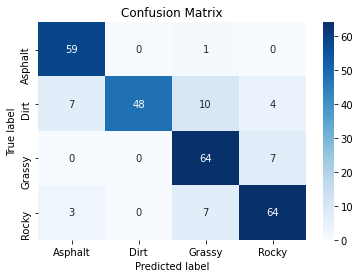

In [18]:
"""
Cell Purpose: Create confusion matrix for results
"""

#Generate and configure confusion matrix
confusion_matrix = metrics.confusion_matrix(target_values, predicted_values)
labels = list(label_map.keys())
df_confusion_matrix = pd.DataFrame(confusion_matrix, index=labels, columns=labels)
fig = plt.figure()
res = sns.heatmap(df_confusion_matrix, annot=True, cmap='Blues')

plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()
plt.close()